# U.S. Census Data: Male vs Female Did Not Work Rates 

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
from census import Census
import us 
from scipy.stats import linregress
import scipy.stats as st
# Import U.S. Census API Key
from config import api_key

## Retrieve data from the U.S. Census using the Census library

References:

https://api.census.gov/data/2017/acs/acs5/variables.html

  NEEDED:

  B23022_001E Estimate!!Total: 
  SEX BY WORK STATUS IN THE PAST 12 MONTHS BY USUAL HOURS WORKED PER WEEK IN THE PAST 12 MONTHS BY WEEKS WORKED IN THE PAST 12 MONTHS FOR THE POPULATION 16 TO 64 YEARS

  B23001_088E Estimate!!Total:!!Female:
  SEX BY AGE BY EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER

  B23022_049E Estimate!!Total:!!Female:!!Did not work in the past 12 months
  SEX BY WORK STATUS IN THE PAST 12 MONTHS BY USUAL HOURS WORKED PER WEEK IN THE PAST 12 MONTHS BY WEEKS WORKED IN THE PAST 12 MONTHS FOR THE POPULATION 16 TO 64 YEARS
 
  B23022_002E Estimate!!Total:!!Male:
  SEX BY WORK STATUS IN THE PAST 12 MONTHS BY USUAL HOURS WORKED PER WEEK IN THE PAST 12 MONTHS BY WEEKS WORKED IN THE PAST 12 MONTHS FOR THE POPULATION 16 TO 64 YEARS

  B23022_025E Estimate!!Total:!!Male:!!Did not work in the past 12 months
  SEX BY WORK STATUS IN THE PAST 12 MONTHS BY USUAL HOURS WORKED PER WEEK IN THE PAST 12 MONTHS BY WEEKS WORKED IN THE PAST 12 MONTHS FOR THE POPULATION 16 TO 64 YEARS

In [4]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)

years = [2017,2018,2019,2020,2021]

for year in years:

    c = Census(
    api_key,
    year = year
              )
    
    census_data = c.acs5.get(
        (
            "NAME",
            "B19013_001E", #pop 
            "B01003_001E", #median age
            "B01002_001E", #household income
            "B19301_001E", #Per capital income
            "B17001_002E", #poverty count
            "B23022_001E", #total work force
            "B23001_088E", #total female workforce
            "B23022_049E", #total female did not work
            "B23022_002E", #total male workforce
            "B23022_025E", #total male did not work
            "B15003_023E", # masters degrees
            "B25058_001E", #median rent

            
        ), {'for': 'state:*', 'for': 'congressional district:*'}
    )


# # Convert to DataFrame, add the year of the census data, concatenate dfs together
    if year == years[0]:
        census_pd = pd.DataFrame(census_data)
        census_pd['Year'] = year
        census_pd_combined = census_pd
    else:
        census_pd = pd.DataFrame(census_data)
        census_pd['Year'] = year
        census_pd_combined = pd.concat([census_pd,census_pd_combined])

#Column renaming
census_pd_combined = census_pd_combined.rename(
    columns = {
        "NAME":        "Name",
        "B01003_001E": "Population",
        "B01002_001E": "Median Age",
        "B19013_001E": "Household Income",
        "B19301_001E": "Per Capita Income",
        "B17001_002E": "Poverty Count",
        "B23022_001E": "Total Work Force",
        "B23001_088E": "Total Female Workforce",
        "B23022_049E": "Total Female Did Not Work",
        "B23022_002E": "Total Male Workforce",
        "B23022_025E": "Total Male Did Not Work",
        "B15003_023E": "Masters Attainment",
        "B25058_001E": "Median Rent"
        
    }
        )



In [5]:
# Show Dataframe
census_pd_combined.head()

,Name,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Total Work Force,Total Female Workforce,Total Female Did Not Work,Total Male Workforce,Total Male Did Not Work,Masters Attainment,Median Rent,state,congressional district,Year
0,"Congressional District 1 (116th Congress), Ala...",53606.0,722794.0,40.3,29688.0,109032.0,447518.0,301800.0,77217.0,217406.0,55953.0,33551.0,707.0,01,01,2021
1,"Congressional District 2 (116th Congress), Ala...",52194.0,689681.0,39.0,28319.0,115310.0,435275.0,287843.0,76285.0,213201.0,54707.0,31270.0,619.0,01,02,2021
2,"Congressional District 3 (116th Congress), Ala...",53090.0,731482.0,38.8,28451.0,121511.0,468161.0,304646.0,77313.0,230635.0,57921.0,35868.0,590.0,01,03,2021
3,"Congressional District 4 (116th Congress), Ala...",50931.0,702255.0,40.9,27056.0,109196.0,431360.0,285978.0,76826.0,216170.0,50766.0,24306.0,469.0,01,04,2021
4,"Congressional District 5 (116th Congress), Ala...",63180.0,751690.0,39.8,35350.0,90719.0,483297.0,310448.0,75739.0,241259.0,48404.0,52340.0,643.0,01,05,2021


In [24]:
# Add a Male Did Not Work Rate, Female Did Not Work Rate, Delta
census_pd_combined["Male DNW %"] = 100 * census_pd_combined["Total Male Did Not Work"] / census_pd_combined["Total Male Workforce"]
census_pd_combined["Female DNW %"] = 100 * census_pd_combined["Total Female Did Not Work"] / census_pd_combined["Total Female Workforce"]
census_pd_combined['DNW Delta'] = census_pd_combined['Female DNW %']-census_pd_combined['Male DNW %']
census_pd_combined['Poverty Rate'] = 100 * census_pd_combined["Poverty Count"] / census_pd_combined["Population"]

# Display DataFrame length and sample data

print(f"Number of rows in the DataFrame: {len(census_pd_combined)}")
census_pd_combined.head()



Number of rows in the DataFrame: 2197


,Name,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Total Work Force,Total Female Workforce,Total Female Did Not Work,Total Male Workforce,Total Male Did Not Work,Masters Attainment,Median Rent,state,congressional district,Year,Male DNW %,Female DNW %,DNW Delta,Poverty Rate
0,"Congressional District 1 (116th Congress), Ala...",53606.0,722794.0,40.3,29688.0,109032.0,447518.0,301800.0,77217.0,217406.0,55953.0,33551.0,707.0,1,01,2021,25.736640,25.585487,-0.151153,15.084796
1,"Congressional District 2 (116th Congress), Ala...",52194.0,689681.0,39.0,28319.0,115310.0,435275.0,287843.0,76285.0,213201.0,54707.0,31270.0,619.0,1,02,2021,25.659823,26.502295,0.842471,16.719324
2,"Congressional District 3 (116th Congress), Ala...",53090.0,731482.0,38.8,28451.0,121511.0,468161.0,304646.0,77313.0,230635.0,57921.0,35868.0,590.0,1,03,2021,25.113708,25.377980,0.264272,16.611619
3,"Congressional District 4 (116th Congress), Ala...",50931.0,702255.0,40.9,27056.0,109196.0,431360.0,285978.0,76826.0,216170.0,50766.0,24306.0,469.0,1,04,2021,23.484295,26.864304,3.380009,15.549337
4,"Congressional District 5 (116th Congress), Ala...",63180.0,751690.0,39.8,35350.0,90719.0,483297.0,310448.0,75739.0,241259.0,48404.0,52340.0,643.0,1,05,2021,20.063086,24.396678,4.333593,12.068672


In [23]:

# Save the DataFrame as a CSV or read the dataframe

#census_pd_combined.to_csv("census_data.csv", encoding="utf-8", index=False)

#census_pd_combined = pd.read_csv("../Data/census_data.csv")

census_pd_combined

,Name,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Total Work Force,Total Female Workforce,Total Female Did Not Work,Total Male Workforce,Total Male Did Not Work,Masters Attainment,Median Rent,state,congressional district,Year,Male DNW %,Female DNW %,DNW Delta
0,"Congressional District 1 (116th Congress), Ala...",53606.0,722794.0,40.3,29688.0,109032.0,447518.0,301800.0,77217.0,217406.0,55953.0,33551.0,707.0,1,01,2021,25.736640,25.585487,-0.151153
1,"Congressional District 2 (116th Congress), Ala...",52194.0,689681.0,39.0,28319.0,115310.0,435275.0,287843.0,76285.0,213201.0,54707.0,31270.0,619.0,1,02,2021,25.659823,26.502295,0.842471
2,"Congressional District 3 (116th Congress), Ala...",53090.0,731482.0,38.8,28451.0,121511.0,468161.0,304646.0,77313.0,230635.0,57921.0,35868.0,590.0,1,03,2021,25.113708,25.377980,0.264272
3,"Congressional District 4 (116th Congress), Ala...",50931.0,702255.0,40.9,27056.0,109196.0,431360.0,285978.0,76826.0,216170.0,50766.0,24306.0,469.0,1,04,2021,23.484295,26.864304,3.380009
4,"Congressional District 5 (116th Congress), Ala...",63180.0,751690.0,39.8,35350.0,90719.0,483297.0,310448.0,75739.0,241259.0,48404.0,52340.0,643.0,1,05,2021,20.063086,24.396678,4.333593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,"Congressional District 2 (115th Congress), Texas",75989.0,767312.0,35.3,40267.0,80005.0,521305.0,301525.0,73161.0,264826.0,36673.0,53472.0,993.0,48,02,2017,13.847961,24.263660,10.415699
2193,"Congressional District 4 (115th Congress), Texas",51945.0,728435.0,39.2,26549.0,106074.0,450290.0,291712.0,74141.0,224333.0,49427.0,25744.0,601.0,48,04,2017,22.032871,25.415821,3.382950
2194,"Congressional District 8 (115th Congress), Texas",66893.0,807525.0,36.7,33423.0,92583.0,521633.0,307296.0,87872.0,269763.0,64112.0,37782.0,864.0,48,08,2017,23.766046,28.595231,4.829184
2195,"Congressional District 10 (115th Congress), Texas",72361.0,813505.0,35.5,35884.0,82145.0,533905.0,316616.0,73838.0,268328.0,38118.0,51083.0,935.0,48,10,2017,14.205748,23.320995,9.115246


In [25]:
#Split the name column into congressional district and state
census_pd_combined[['Congressional District Name','State Name']] = census_pd_combined['Name'].str.split(',',expand=True)
census_pd_combined['Congressional District Name'].str.replace(' ', '') 
census_pd_combined['State Name'].str.replace(' ', '') 
census_pd_combined.head()

,Name,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Total Work Force,Total Female Workforce,Total Female Did Not Work,Total Male Workforce,...,Median Rent,state,congressional district,Year,Male DNW %,Female DNW %,DNW Delta,Poverty Rate,Congressional District Name,State Name
0,"Congressional District 1 (116th Congress), Ala...",53606.0,722794.0,40.3,29688.0,109032.0,447518.0,301800.0,77217.0,217406.0,...,707.0,1,01,2021,25.736640,25.585487,-0.151153,15.084796,Congressional District 1 (116th Congress),Alabama
1,"Congressional District 2 (116th Congress), Ala...",52194.0,689681.0,39.0,28319.0,115310.0,435275.0,287843.0,76285.0,213201.0,...,619.0,1,02,2021,25.659823,26.502295,0.842471,16.719324,Congressional District 2 (116th Congress),Alabama
2,"Congressional District 3 (116th Congress), Ala...",53090.0,731482.0,38.8,28451.0,121511.0,468161.0,304646.0,77313.0,230635.0,...,590.0,1,03,2021,25.113708,25.377980,0.264272,16.611619,Congressional District 3 (116th Congress),Alabama
3,"Congressional District 4 (116th Congress), Ala...",50931.0,702255.0,40.9,27056.0,109196.0,431360.0,285978.0,76826.0,216170.0,...,469.0,1,04,2021,23.484295,26.864304,3.380009,15.549337,Congressional District 4 (116th Congress),Alabama
4,"Congressional District 5 (116th Congress), Ala...",63180.0,751690.0,39.8,35350.0,90719.0,483297.0,310448.0,75739.0,241259.0,...,643.0,1,05,2021,20.063086,24.396678,4.333593,12.068672,Congressional District 5 (116th Congress),Alabama


In [32]:
#Summary Statistics for Male & Female DNW Rates, Disparity, Poverty Rates by year 

census_pd_combined_groupby = census_pd_combined.groupby(['Year'],as_index= False)
census_pd_combined_groupby.agg(['mean'])    

TypeError: agg function failed [how->mean,dtype->object]

<Axes: title={'center': 'State vs. Did Not Work Disparity in 2021'}, xlabel='State', ylabel='Gender Did Not Work Disparity'>

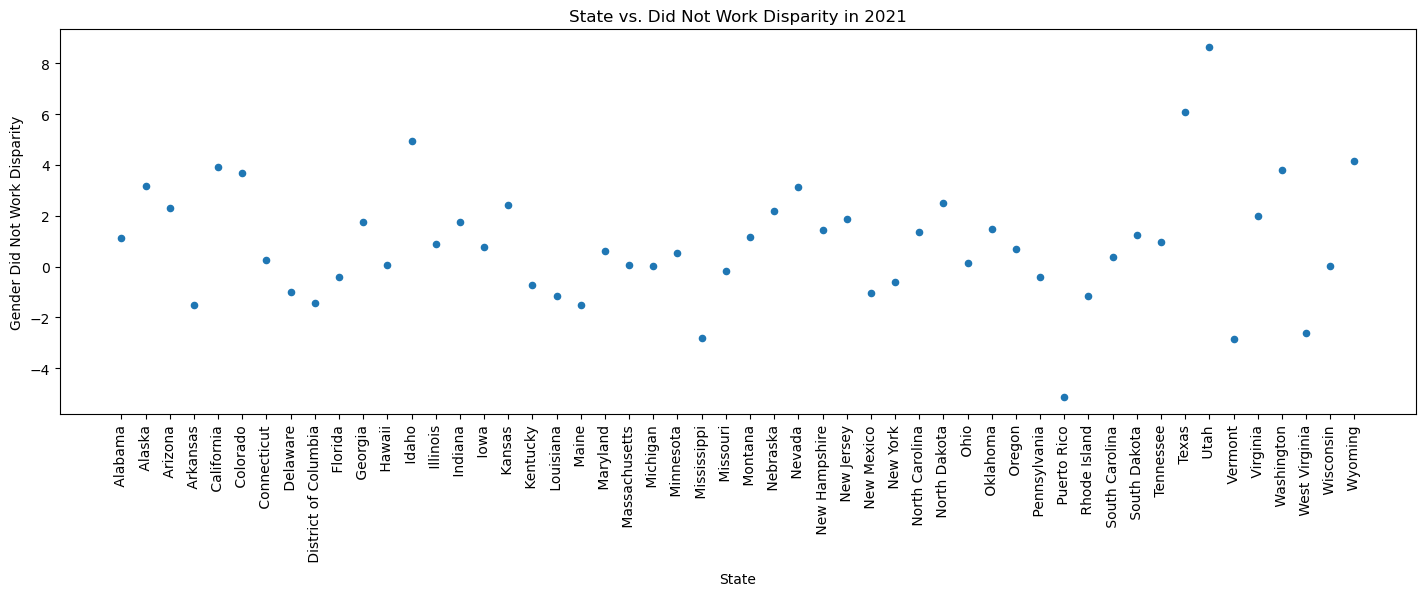

In [26]:
# Build the scatter plots for DNW & State
census_data_2021 = census_pd_combined.loc[census_pd_combined['Year'] == 2021]
census_pd_combined_groupby = census_data_2021.groupby(['State Name'],as_index= False)
census_pd_combined_mean = census_pd_combined_groupby['DNW Delta'].mean()
census_pd_combined_mean_df = pd.DataFrame(census_pd_combined_mean)
census_pd_combined_mean_df

title = 'State vs. Did Not Work Disparity in 2021'
xlabel = 'State'
ylabel = 'Gender Did Not Work Disparity'
census_pd_combined_mean_df.plot.scatter(x = 'State Name', y = 'DNW Delta', title = title, xlabel = xlabel, ylabel = ylabel,figsize=(17.5,5),rot = 90)



,Year,DNW Delta
0,2017,2.287976
1,2018,2.179029
2,2019,2.022752
3,2020,1.696207
4,2021,1.542475


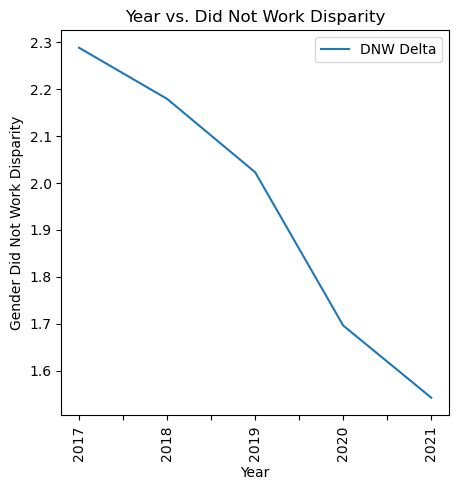

In [33]:
# Build the scatter plots for all states Over Time

census_pd_combined_groupby = census_pd_combined.groupby(['Year'],as_index= False)
census_pd_combined_mean = census_pd_combined_groupby['DNW Delta'].mean()
census_pd_combined_mean_df = pd.DataFrame(census_pd_combined_mean)
census_pd_combined_mean_df['Year'] = census_pd_combined_mean_df['Year'].astype(str)

title = 'Year vs. Did Not Work Disparity'
xlabel = 'Year'
ylabel = 'Gender Did Not Work Disparity'
census_pd_combined_mean_df.plot.line(x = 'Year', y = 'DNW Delta', title = title, xlabel = xlabel, ylabel = ylabel,figsize=(5,5),rot = 90)

census_pd_combined_mean_df

,Year,Male DNW %
0,2017,20.299687
1,2018,19.866003
2,2019,19.454958
3,2020,19.094418
4,2021,19.252077


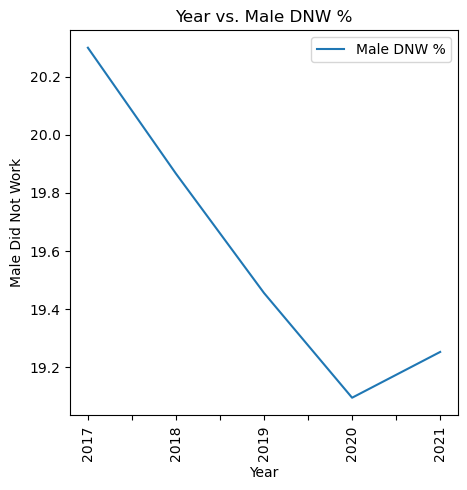

In [35]:
# Build the Male DNW rate Over Time

census_pd_combined_groupby = census_pd_combined.groupby(['Year'],as_index= False)
census_pd_combined_mean = census_pd_combined_groupby['Male DNW %'].mean()
census_pd_combined_mean_df = pd.DataFrame(census_pd_combined_mean)
census_pd_combined_mean_df['Year'] = census_pd_combined_mean_df['Year'].astype(str)

title = 'Year vs. Male DNW %'
xlabel = 'Year'
ylabel = 'Male Did Not Work'
census_pd_combined_mean_df.plot.line(x = 'Year', y = 'Male DNW %', title = title, xlabel = xlabel, ylabel = ylabel,figsize=(5,5),rot = 90)

census_pd_combined_mean_df

,Year,Female DNW %
0,2017,22.587664
1,2018,22.045032
2,2019,21.477710
3,2020,20.790625
4,2021,20.794552


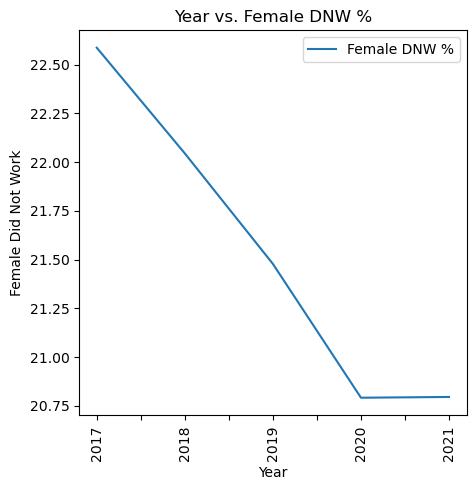

In [36]:
# Build the Female DNW rate Over Time

census_pd_combined_groupby = census_pd_combined.groupby(['Year'],as_index= False)
census_pd_combined_mean = census_pd_combined_groupby['Female DNW %'].mean()
census_pd_combined_mean_df = pd.DataFrame(census_pd_combined_mean)
census_pd_combined_mean_df['Year'] = census_pd_combined_mean_df['Year'].astype(str)

title = 'Year vs. Female DNW %'
xlabel = 'Year'
ylabel = 'Female Did Not Work'
census_pd_combined_mean_df.plot.line(x = 'Year', y = 'Female DNW %', title = title, xlabel = xlabel, ylabel = ylabel,figsize=(5,5),rot = 90)

census_pd_combined_mean_df

,Year,Poverty Rate
0,2017,14.315516
1,2018,13.811113
2,2019,13.208590
3,2020,12.652172
4,2021,12.475131


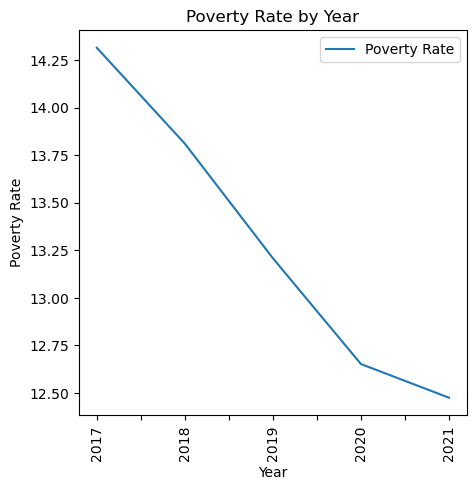

In [34]:
# Build the scatter plots for all states Over Time (poverty rate)
census_pd_combined_groupby = census_pd_combined.groupby(['Year'],as_index= False)
census_pd_combined_mean = census_pd_combined_groupby['Poverty Rate'].mean()
census_pd_combined_mean_df = pd.DataFrame(census_pd_combined_mean)
census_pd_combined_mean_df['Year'] = census_pd_combined_mean_df['Year'].astype(str)

title = 'Poverty Rate by Year'
xlabel = 'Year'
ylabel = 'Poverty Rate'
census_pd_combined_mean_df.plot.line(x = 'Year', y = 'Poverty Rate', title = title, xlabel = xlabel, ylabel = ylabel,figsize=(5,5),rot = 90)

census_pd_combined_mean_df

<Axes: title={'center': 'Utah Unemployment Disparity'}, xlabel='State', ylabel='Gender Unemployment Disparity'>

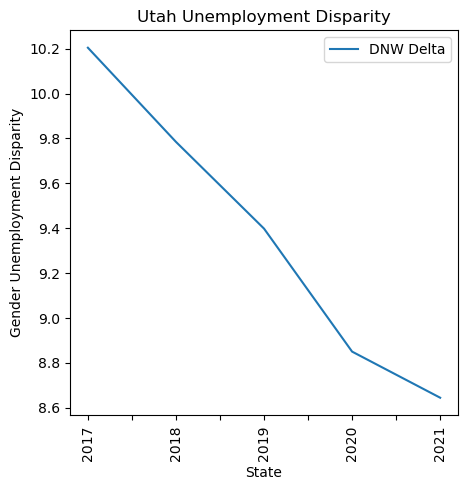

In [99]:
# Build the scatter plots Utah

census_pd_combined['State Name'].values


census_pd_combined_utah = census_pd_combined.loc[census_pd_combined['State Name'] == ' Utah']
census_pd_combined_utah
census_pd_combined_groupby = census_pd_combined_utah.groupby(['Year'],as_index= False)
census_pd_combined_mean = census_pd_combined_groupby['DNW Delta'].mean()
census_pd_combined_mean_df = pd.DataFrame(census_pd_combined_mean)
census_pd_combined_mean_df['Year'] = census_pd_combined_mean_df['Year'].astype(str)

census_pd_combined_mean_df

title = 'Utah Unemployment Disparity'
xlabel = 'State'
ylabel = 'Gender Unemployment Disparity'
census_pd_combined_mean_df.plot.line(x = 'Year', y = 'DNW Delta', title = title, xlabel = xlabel, ylabel = ylabel,figsize=(5,5),rot = 90)


<Axes: title={'center': 'Texas Unemployment Disparity'}, xlabel='State', ylabel='Gender Unemployment Disparity'>

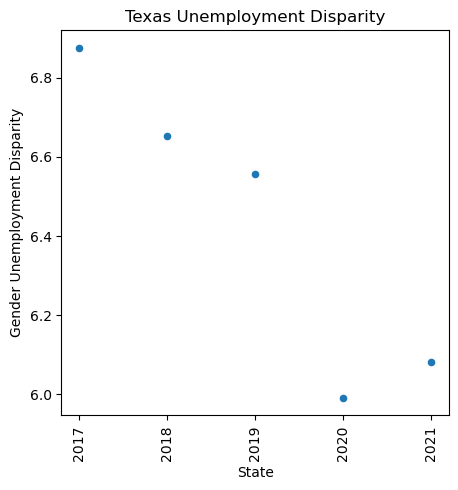

In [15]:
# Build the scatter plots Texas

census_pd_combined['State Name'].values


census_pd_combined_utah = census_pd_combined.loc[census_pd_combined['State Name'] == ' Texas']
census_pd_combined_utah
census_pd_combined_groupby = census_pd_combined_utah.groupby(['Year'],as_index= False)
census_pd_combined_mean = census_pd_combined_groupby['DNW Delta'].mean()
census_pd_combined_mean_df = pd.DataFrame(census_pd_combined_mean)
census_pd_combined_mean_df['Year'] = census_pd_combined_mean_df['Year'].astype(str)

census_pd_combined_mean_df

title = 'Texas Unemployment Disparity'
xlabel = 'State'
ylabel = 'Gender Unemployment Disparity'
census_pd_combined_mean_df.plot.scatter(x = 'Year', y = 'DNW Delta', title = title, xlabel = xlabel, ylabel = ylabel,figsize=(5,5),rot = 90)

<Axes: title={'center': 'CA Unemployment Disparity'}, xlabel='State', ylabel='Gender Unemployment Disparity'>

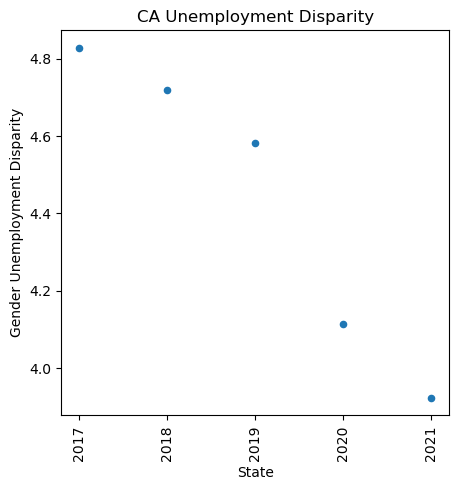

In [16]:
# Build the scatter plots CA

census_pd_combined['State Name'].values


census_pd_combined_utah = census_pd_combined.loc[census_pd_combined['State Name'] == ' California']
census_pd_combined_utah
census_pd_combined_groupby = census_pd_combined_utah.groupby(['Year'],as_index= False)
census_pd_combined_mean = census_pd_combined_groupby['DNW Delta'].mean()
census_pd_combined_mean_df = pd.DataFrame(census_pd_combined_mean)
census_pd_combined_mean_df['Year'] = census_pd_combined_mean_df['Year'].astype(str)

census_pd_combined_mean_df

title = 'CA Unemployment Disparity'
xlabel = 'State'
ylabel = 'Gender Unemployment Disparity'
census_pd_combined_mean_df.plot.scatter(x = 'Year', y = 'DNW Delta', title = title, xlabel = xlabel, ylabel = ylabel,figsize=(5,5),rot = 90)

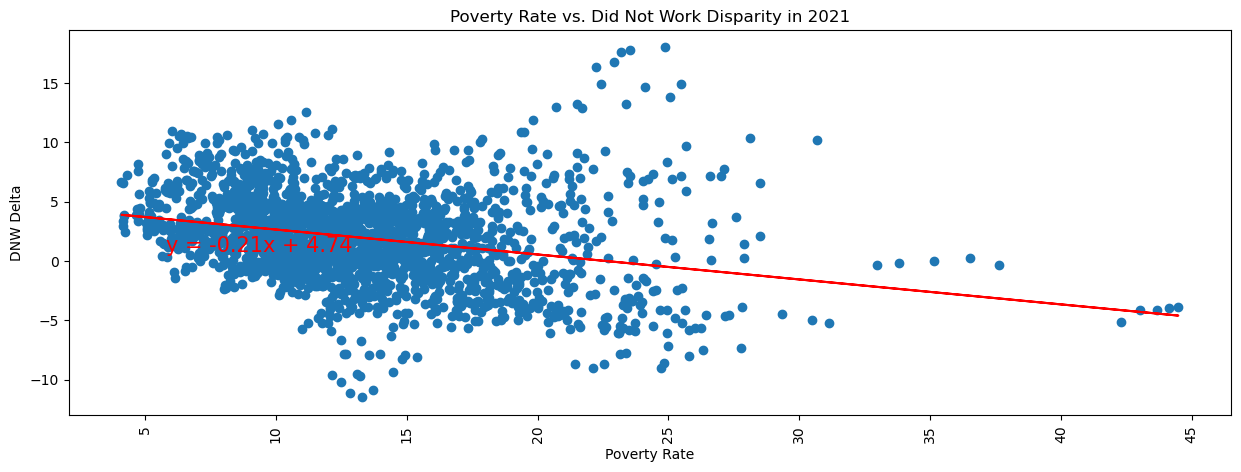

The p value of 2.1639120516309905e-40 means we can reject the Hnull, and conclude that there is a significant relationship between unemployment disparity and poverty rates


In [29]:
# Build the scatter plots disparity vs poverty

census_pd_combined_nonull = census_pd_combined.dropna()

title = 'Poverty Rate vs. Did Not Work Disparity in 2021'
xlabel = 'Disparity'
ylabel = 'Poverty Rate'
census_pd_combined_nonull.plot.scatter(x = 'Poverty Rate', y = 'DNW Delta', title = title, xlabel = xlabel, ylabel = ylabel,figsize=(15,5),rot = 90)



x_values = census_pd_combined_nonull['Poverty Rate']
y_values = census_pd_combined_nonull['DNW Delta']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Poverty Rate')
plt.ylabel('DNW Delta')
plt.show()

print(f'The p value of {pvalue} means we can reject the Hnull, and conclude that there is a significant relationship between unemployment disparity and poverty rates')